In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
m = np.zeros((47, 47))
m[22:25, 22:25] = 2  # center
r = np.array([21, 46])  # initial position
v = np.array([0, -1])  # initial velocity

```
Quadrants:

    y
    ^
0   |\       /
    | \  2  /
    |  \   /
    |   \ /
    | 1  .  3
    |   / \
    |  /   \
    | /  4  \
    |/       \
46  +---------->x
    0        46

```

In [3]:
middles = []  # turning ponts on the middle

middles_q4_left = [28, 30, 32, 34, 40, 42, 44, 46]
middles.extend([[19, i] for i in middles_q4_left])

middles_q4_right = [26, 28, 30, 32, 38, 40, 42, 44]
middles.extend([[25, i] for i in middles_q4_right])

middles_x = [2, 4, 8, 10, 14, 16, 28, 30, 34, 36, 40, 42]
middles.extend([[i, 22] for i in middles_x])
middles.extend([[i, 24] for i in middles_x])

middles_y = [0, 2, 6, 8, 12, 14, 18, 20]
middles.extend([[22, i] for i in middles_y])
middles.extend([[24, i] for i in middles_y])

middles = [tuple(p) for p in middles]

In [4]:
def get_quadrant(r):
    """47, 46, whatever..."""
    if r[1] > r[0]:
        if 47 - r[0] > r[1]:
            return 1
        else:
            return 4
    else:
        if 47 - r[0] > r[1]:
            return 2
        else:
            return 3
    return

def get_quadrant_vals(q):
    """Return tangential axis (0 for x, 1 for y), default turn velocity (pointing to center)"""
    if q == 1:
        return 1, np.array([1, 0])
    elif q == 2:
        return 0, np.array([0, 1])
    elif q == 3:
        return 1, np.array([-1, 0])
    elif q == 4:
        return 0, np.array([0, -1])

def is_diagonal(r):
    """Check whether position is in a diagonal"""
    if r[0] in [r[1], 46 - r[1]]:  # note, 46, NOT 47
        return True
    return False

def turn_diagonal(r, v):
    """Return new velocity when in a diagonal"""
    if r[0] == r[1]:
        return -1 * np.array([v[1], v[0]])
    elif r[0] == 46 - r[1]:
        return np.array([v[1], v[0]])

def z2oo2z(n):
    """0 to 1, 1 to 0, used by turn_middle"""
    return abs(1-n)

def turn_middle(r, v):
    """Return new velocity when in middle points"""
    q = get_quadrant(r)
    ax_idx, v_new = get_quadrant_vals(q)
    
    # velocity is tangential
    if v[ax_idx] != 0:
        v = v_new
    # velocity is radial
    else:
        v[z2oo2z(ax_idx)] = 0
        if q in [1, 3]:
            v[ax_idx] = np.sign(r[1] - 23)
        else:
            v[ax_idx] = np.sign(r[0] - 23)
    
    # hard fix!
    if r[0] == 19 and r[1] == 28:
        v = np.array([0, 1])
    if r[0] == 25 and r[1] == 26:
        v = np.array([0, 1])
    if r[0] == 25 and r[1] == 38:
        v = np.array([0, 1])
        
    fut = r + 2 * v
    if m[fut[0], fut[1]] !=0:
        v *= -1
    return v

def get_direction(r, v):
    """Return new velocity for current point"""
    # first part
    if r[0] == 21:
        if r[1] in [38, 26]:
            v = np.array([-1, 0])
        elif r[1] == 36:
            v = np.array([0, -1])

    # last part
    if r[0] == 23:
        if r[1] in [46, 34]:  # check
            v = np.array([0, -1])
        elif r[1] == 36:
            v = np.array([1, 0])

    # turn on diagonal points
    if is_diagonal(r):
        v = turn_diagonal(r, v)

    # turn on selected middle points
    if tuple(r) in middles:
        v = turn_middle(r, v)

    return v

In [5]:
for i in range(1200):
    m[r[0], r[1]] = i + 1
    v0 = v
    v = get_direction(r, v)
    r += v
    if all(r == np.array([23, 23])):
        m[22:25, 22:25] = i
        break

In [6]:
# adjust blank cells
m2 = m.copy()
m2[m2 == 0] = -200  # about 1/6 th

In [7]:
cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

In [8]:
all(np.array([1, 2]) == np.array([1, 2]))

True

In [9]:
#cmap_idx = 68

In [10]:
cmaps_selected = [
    "Blues",
    "Blues_r",
    "BrBG",
    "BrBG_r",
    "BuPu",
    "BuPu_r",
    "CMRmap",
    "CMRmap_r",
    "GnBu",
    "GnBu_r",
    "PuBu",
    "PuBu_r",
    "PuBuGn",
    "PuBuGn_r",
    "PuRd",
    "PuRd_r",
    "RdBu",
    "RdBu_r",
    "RdPu",
    "RdPu_r",
    "RdYlBu",
    "RdYlBu_r",
    "Spectral",
    "Spectral_r",
    "YlGnBu",
    "YlGnBu_r",
    "afmhot",
    "afmhot_r",
    "cool",
    "cool_r",
    "gist_earth",
    "gist_earth_r",
    "gist_heat",
    "gist_heat_r",
    "gnuplot2",
    "gnuplot2_r",
    "hot",
    "hot_r",
    "jet",
    "jet_r",
    "nipy_spectral",
    "nipy_spectral_r",
    "ocean",
    "ocean_r",
    "rainbow",
    "rainbow_r",
]

In [11]:
cmaps2 = np.array(cmaps_selected)

In [12]:
cmaps2 = cmaps2.reshape([23, 2])

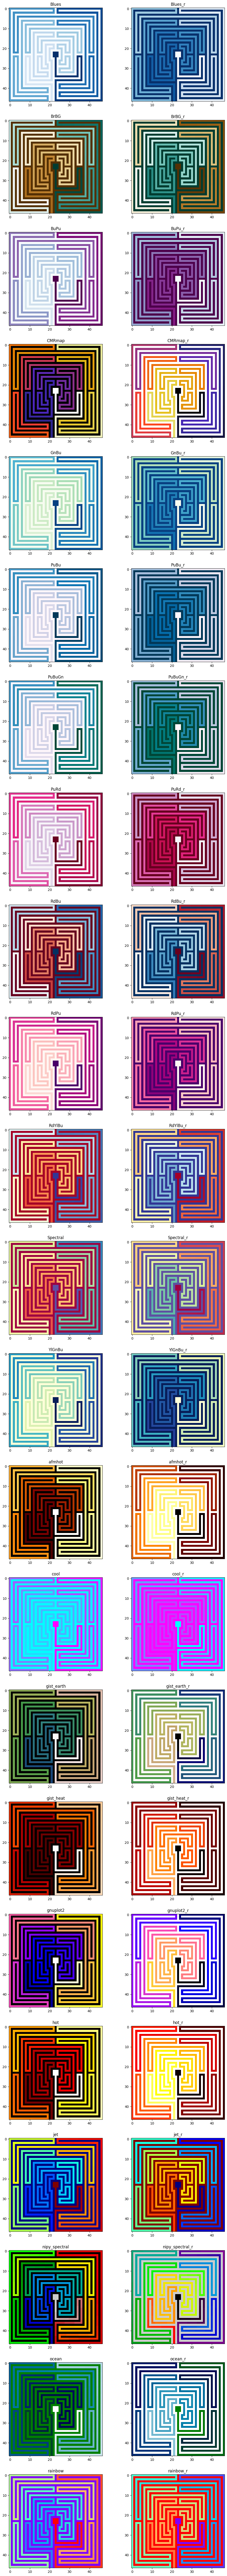

In [13]:
fig, axs = plt.subplots(23, 2, figsize=(12, 138))
for i, _ in enumerate(cmaps2):
    for j, _ in enumerate(cmaps2[i]):
        cmap = cmaps2[i][j]
        axs[i][j].set_title(cmap)
        im = axs[i][j].imshow(m2.T, cmap=cmap)

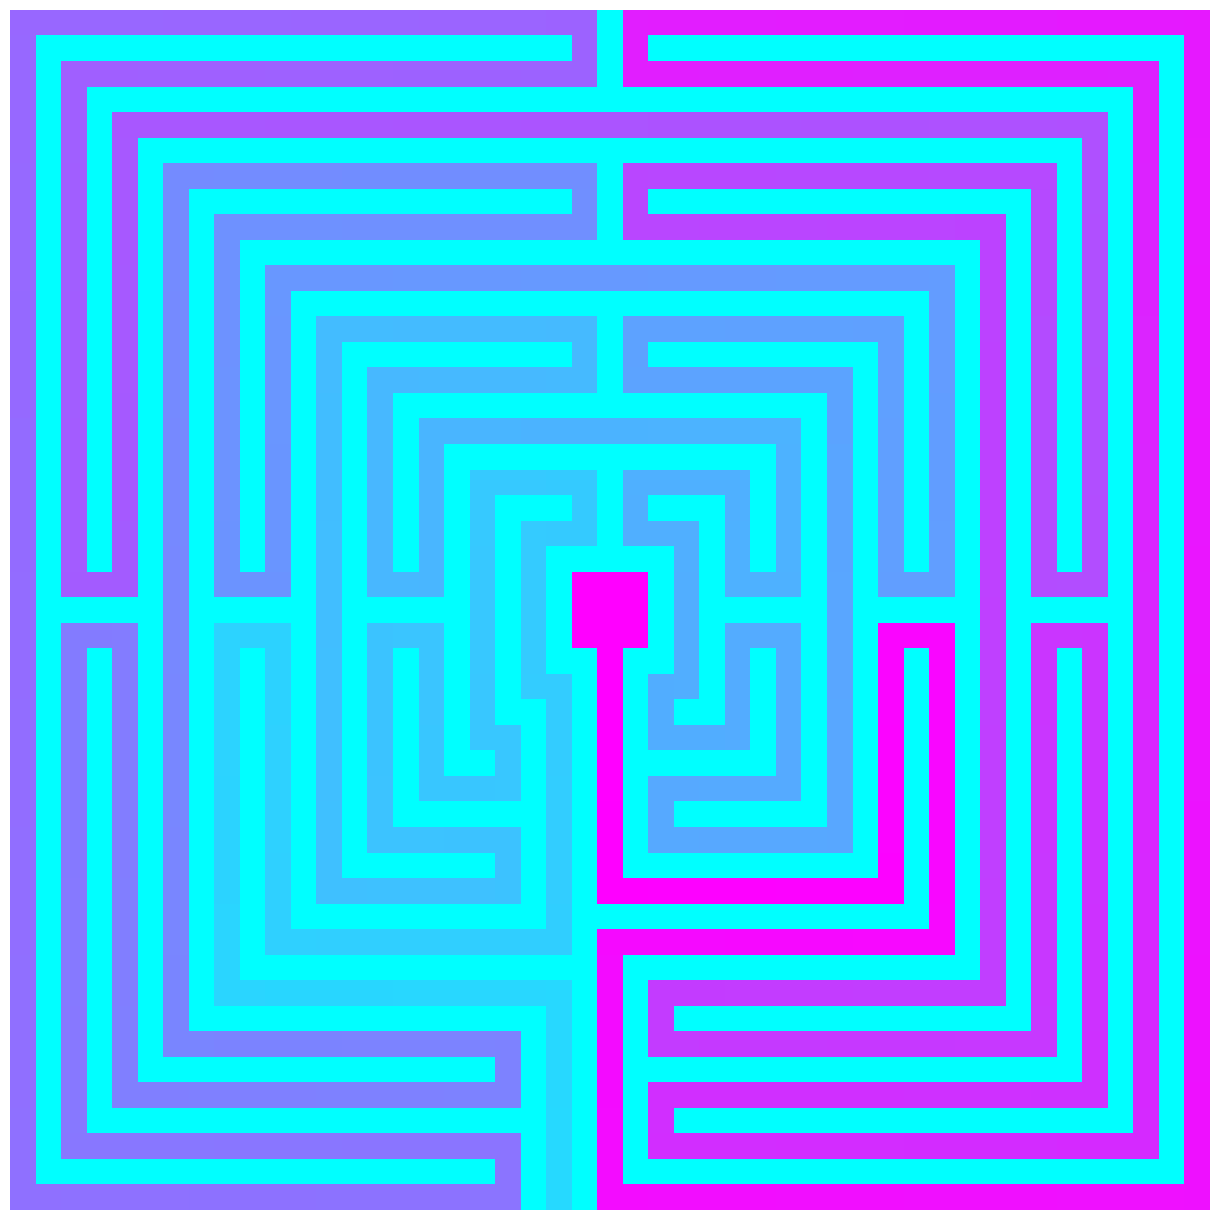

In [14]:
# clean figure
fig, ax = plt.subplots(figsize=(12, 12))
cmap = "cool"
im = ax.imshow(m2.T, cmap=cmap)
plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.subplots_adjust(
    left=0,
    right=1,
    top=1,
    bottom=0
)
plt.savefig(f"labyrinth_{cmap}.png", dpi=400)